# Initialize

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='2'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
#import seaborn as sns
#import warnings
#import csv
#import gc
#from time import time
#import logging
from scipy.io import loadmat
#from select_win import select_win,select_windows
#import load_data as ldfile
#import create_model as cmodel

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from pyts.datasets import load_gunpoint
from pyts.image import GramianAngularField

#from scipy.signal import butter, sosfilt, sosfilt_zi, sosfiltfilt, lfilter, lfilter_zi, filtfilt, sosfreqz, resample
#from utils import hamilton_detector, christov_detector, findpeaks, engzee_detector
#from ecg_detectors.ecgdetectors import Detectors, MWA, panPeakDetect, searchBack

np.random.seed(354)
#sns.set()
#warnings.filterwarnings('ignore')
#logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.random.set_seed(1342) # Set seed for reproducibility


# Load data

In [3]:
input_directory = '/dataset/PhysioNet2020/Training_WFDB'

In [4]:
def load_challenge_data(filename): # This function was borrowed from PhysioNet challenge
    x = loadmat(filename)
    data = np.asarray(x['val'], dtype=np.float64)

    new_file = filename.replace('.mat','.hea')
    input_header_file = os.path.join(new_file)

    with open(input_header_file,'r') as f:
        header_data=f.readlines()

    return data, header_data

In [5]:
# Displaying header and data for on file: 'A0001.mat'
tmp_input_file = os.path.join(input_directory,'A0001.mat')
x = loadmat(tmp_input_file)
data = np.asarray(x['val'], dtype=np.float64)

new_file = tmp_input_file.replace('.mat','.hea')
input_header_file = os.path.join(new_file)

with open(input_header_file,'r') as f:
    header_data=f.readlines()

In [6]:
data

array([[  28.,   39.,   45., ...,  258.,  259.,  259.],
       [   7.,   11.,   15., ...,  248.,  249.,  250.],
       [ -21.,  -28.,  -30., ...,  -10.,  -10.,   -9.],
       ...,
       [-112., -110., -108., ...,  194.,  194.,  195.],
       [-596., -590., -582., ...,  307.,  307.,  307.],
       [ -16.,   -7.,    2., ...,  213.,  214.,  214.]])

In [6]:
data.shape

(12, 7500)

In [17]:
type(data)

numpy.ndarray

In [18]:
header_data

['A0001 12 500 7500 12-May-2020 12:33:59\n',
 'A0001.mat 16+24 1000/mV 16 0 28 -1716 0 I\n',
 'A0001.mat 16+24 1000/mV 16 0 7 2029 0 II\n',
 'A0001.mat 16+24 1000/mV 16 0 -21 3745 0 III\n',
 'A0001.mat 16+24 1000/mV 16 0 -17 3680 0 aVR\n',
 'A0001.mat 16+24 1000/mV 16 0 24 -2664 0 aVL\n',
 'A0001.mat 16+24 1000/mV 16 0 -7 -1499 0 aVF\n',
 'A0001.mat 16+24 1000/mV 16 0 -290 390 0 V1\n',
 'A0001.mat 16+24 1000/mV 16 0 -204 157 0 V2\n',
 'A0001.mat 16+24 1000/mV 16 0 -96 -2555 0 V3\n',
 'A0001.mat 16+24 1000/mV 16 0 -112 49 0 V4\n',
 'A0001.mat 16+24 1000/mV 16 0 -596 -321 0 V5\n',
 'A0001.mat 16+24 1000/mV 16 0 -16 -3112 0 V6\n',
 '#Age: 74\n',
 '#Sex: Male\n',
 '#Dx: 59118001\n',
 '#Rx: Unknown\n',
 '#Hx: Unknown\n',
 '#Sx: Unknown\n']

In [7]:
from itertools import islice

In [8]:
def window(seq, n=2):
    "Returns a sliding window (of width n) over data from the iterable"
    "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

In [9]:
data[0]

array([ 28.,  39.,  45., ..., 258., 259., 259.])

In [10]:
data[0][1]

39.0

In [11]:
len(data[0])

7500

In [12]:
test_data = pd.DataFrame(data[0][0:1000])
test_data
type(test_data)
test2 = test_data.rolling(9, win_type=None,axis=0)
test2

Rolling [window=9,center=False,axis=0]

<Figure size 432x288 with 0 Axes>

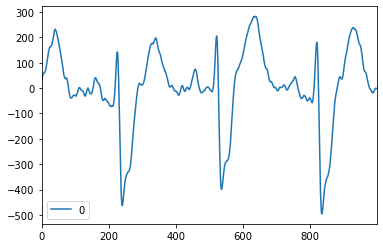

In [13]:
plt.figure(); test_data.plot()

In [14]:
test3= iter(data)
lead1 = (next(test3))
print(lead1)
print(next(test3))
print(next(test3))

windows = iter(lead1)
win1= (next(windows))
print(win1)

[ 28.  39.  45. ... 258. 259. 259.]
[  7.  11.  15. ... 248. 249. 250.]
[-21. -28. -30. ... -10. -10.  -9.]
28.0


In [15]:
temp_data = window(data, n=500)

In [16]:
type(temp_data)

generator

In [17]:
from array import *
data1 = data
data1 = data1*2
print('data:', data)
print("data1:", data1)
print(data.data)
print('data_id:',hex(id(data)))
print(data1.data)
print('data1_id:',hex(id(data1)))

a = np.empty_like (data)
a[:][:] = data
print(a)
print('a_id:',hex(id(a)))
print(a.data)

data: [[  28.   39.   45. ...  258.  259.  259.]
 [   7.   11.   15. ...  248.  249.  250.]
 [ -21.  -28.  -30. ...  -10.  -10.   -9.]
 ...
 [-112. -110. -108. ...  194.  194.  195.]
 [-596. -590. -582. ...  307.  307.  307.]
 [ -16.   -7.    2. ...  213.  214.  214.]]
data1: [[   56.    78.    90. ...   516.   518.   518.]
 [   14.    22.    30. ...   496.   498.   500.]
 [  -42.   -56.   -60. ...   -20.   -20.   -18.]
 ...
 [ -224.  -220.  -216. ...   388.   388.   390.]
 [-1192. -1180. -1164. ...   614.   614.   614.]
 [  -32.   -14.     4. ...   426.   428.   428.]]
data_id: 0x7fbfdad564e0
data1_id: 0x7fbfdad61c60
[[  28.   39.   45. ...  258.  259.  259.]
 [   7.   11.   15. ...  248.  249.  250.]
 [ -21.  -28.  -30. ...  -10.  -10.   -9.]
 ...
 [-112. -110. -108. ...  194.  194.  195.]
 [-596. -590. -582. ...  307.  307.  307.]
 [ -16.   -7.    2. ...  213.  214.  214.]]
a_id: 0x7fbfdac21850


In [18]:
from numpy.lib import stride_tricks

In [11]:
data1.itemsize*1250

10000

In [12]:
frame_length = 2500

hop_length = frame_length / 2
num_frames = 1 + (len(data1) - frame_length) / hop_length
# Each row advances by `hop_length` entries, times the number of bytes in each entry
row_stride = data1.itemsize * hop_length

# Columns are still contiguous, and only advance by one entry
col_stride = data1.itemsize

# as_strided will construct a new view of the data in x, using the shape and stride parameters we supply
#data1_framed_strided = stride_tricks.as_strided(float(data1), 
 #                                           shape=(float(num_frames), float(frame_length)), 
 #                                           strides=(row_stride, col_stride))

data_test_frame = stride_tricks.as_strided(a, (12, 2500), (1000,8))

print (data_test_frame)

[[  28.   39.   45. ...  -29.  -31.  -32.]
 [ -19.  -21.  -26. ... -377. -363. -353.]
 [-357. -350. -348. ...   90.   83.   74.]
 ...
 [-164. -236. -302. ...  166.  157.  148.]
 [ 163.  159.  154. ...  -30.  -31.  -31.]
 [ -20.  -18.  -13. ...   98.  104.  111.]]


In [21]:
type(data_test_frame)

data_test_frame.shape


(12, 2500)

In [22]:
from window_slider import Slider
#import numpy
list1 = np.array([[0, 1, 2, 3, 0, 1, 2, 3]])
bucket_size = 4
overlap_count = 1
slider = Slider(bucket_size,overlap_count)
slider.fit(list1)
while True:
    window_data = slider.slide()
    
    # do your stuff
    print(window_data)
    if slider.reached_end_of_list(): break

[[0 1 2 3]]
[[3 0 1 2]]
[[2 3]]


In [53]:
test_data= np.transpose(data)

### Vectorized stride implementation

In [54]:
def vectorized_stride_v2(array, clearing_time_index, max_time, sub_window_size,
                         stride_size):
    #start = clearing_time_index + 1 - sub_window_size + 1
    start = clearing_time_index
    
    sub_windows = (
        start + 
        np.expand_dims(np.arange(sub_window_size), 0) +
        # Create a rightmost vector as [0, V, 2V, ...].
        np.expand_dims(np.arange(max_time + 1, step=stride_size), 0).T
    )
    
    return array[sub_windows]

In [76]:
test_data.shape
#test_data
#len(test_data[7499])
#test_data.shape

test_data[2500][0]

-29.0

In [131]:
testing = vectorized_stride_v2(test_data, 3000, 12, 3000, 2500)
testing.shape[1]
testing2 = np.transpose(testing)
testing2.shape
testing

array([[[ 1.930e+02,  2.200e+02,  2.700e+01, -2.060e+02,  8.300e+01,
          1.230e+02, -6.840e+02, -4.190e+02, -1.600e+02,  3.490e+02,
          3.500e+02,  6.430e+02],
        [ 2.010e+02,  2.230e+02,  2.200e+01, -2.120e+02,  8.900e+01,
          1.210e+02, -6.960e+02, -4.280e+02, -1.640e+02,  3.510e+02,
          3.520e+02,  6.500e+02],
        [ 2.070e+02,  2.260e+02,  1.900e+01, -2.160e+02,  9.300e+01,
          1.210e+02, -7.070e+02, -4.330e+02, -1.660e+02,  3.540e+02,
          3.540e+02,  6.560e+02],
        [ 2.090e+02,  2.280e+02,  1.900e+01, -2.180e+02,  9.500e+01,
          1.230e+02, -7.170e+02, -4.390e+02, -1.670e+02,  3.560e+02,
          3.570e+02,  6.630e+02],
        [ 2.100e+02,  2.300e+02,  2.000e+01, -2.190e+02,  9.500e+01,
          1.240e+02, -7.260e+02, -4.420e+02, -1.680e+02,  3.590e+02,
          3.590e+02,  6.710e+02],
        [ 2.130e+02,  2.330e+02,  2.000e+01, -2.220e+02,  9.600e+01,
          1.260e+02, -7.340e+02, -4.460e+02, -1.690e+02,  3.630e+02,
  

In [132]:
np.set_printoptions(threshold=np.inf)
#print(testing)
testing.shape

(1, 3000, 12)

In [134]:
testing3= testing.reshape(3000,12)
testing3 = np.transpose(testing3)

In [97]:
np.savetxt("testing2.csv", testing3, delimiter=",")

In [24]:
def extract_windows(array, clearing_time_index, max_time, sub_window_size):
    examples = []
    #start = clearing_time_index + 1 - sub_window_size + 1
    start = clearing_time_index
    
    for i in range(max_time):
        example = array[start+i:start+sub_window_size+i]
        #examples.append(np.expand_dims(example, 1))
        examples.append(example)
        #print(examples)
    
    return np.vstack(examples)

In [25]:
#uncomment the print in definition
testing1 = extract_windows(test_data, 0, 7500, 5000)
testing1
testing1.shape

(25002500, 12)

In [26]:
testing = extract_windows(test_data, 0, 7500, 5000)
testing

array([[  28.,    7.,  -21., ..., -112., -596.,  -16.],
       [  39.,   11.,  -28., ..., -110., -590.,   -7.],
       [  45.,   15.,  -30., ..., -108., -582.,    2.],
       ...,
       [ 259.,  249.,  -10., ...,  194.,  307.,  214.],
       [ 259.,  250.,   -9., ...,  195.,  307.,  214.],
       [ 259.,  250.,   -9., ...,  195.,  307.,  214.]])

In [27]:
testing.shape

(25002500, 12)

In [28]:
def extract_windows_vectorized(array, clearing_time_index, max_time, sub_window_size):
    #start = clearing_time_index + 1 - sub_window_size + 1
    start = clearing_time_index
    
    sub_windows = (
        start +
        # expand_dims are used to convert a 1D array to 2D array.
        np.expand_dims(np.arange(sub_window_size), 0) +
        #np.arange(sub_window_size) +
        np.expand_dims(np.arange(max_time), 0).T
        #np.arange(max_time).T
    )
    
    return array[sub_windows]

In [29]:
num2 = extract_windows_vectorized(test_data, 0, 7500, 2500)

IndexError: index 7500 is out of bounds for axis 0 with size 7500

<Figure size 432x288 with 0 Axes>

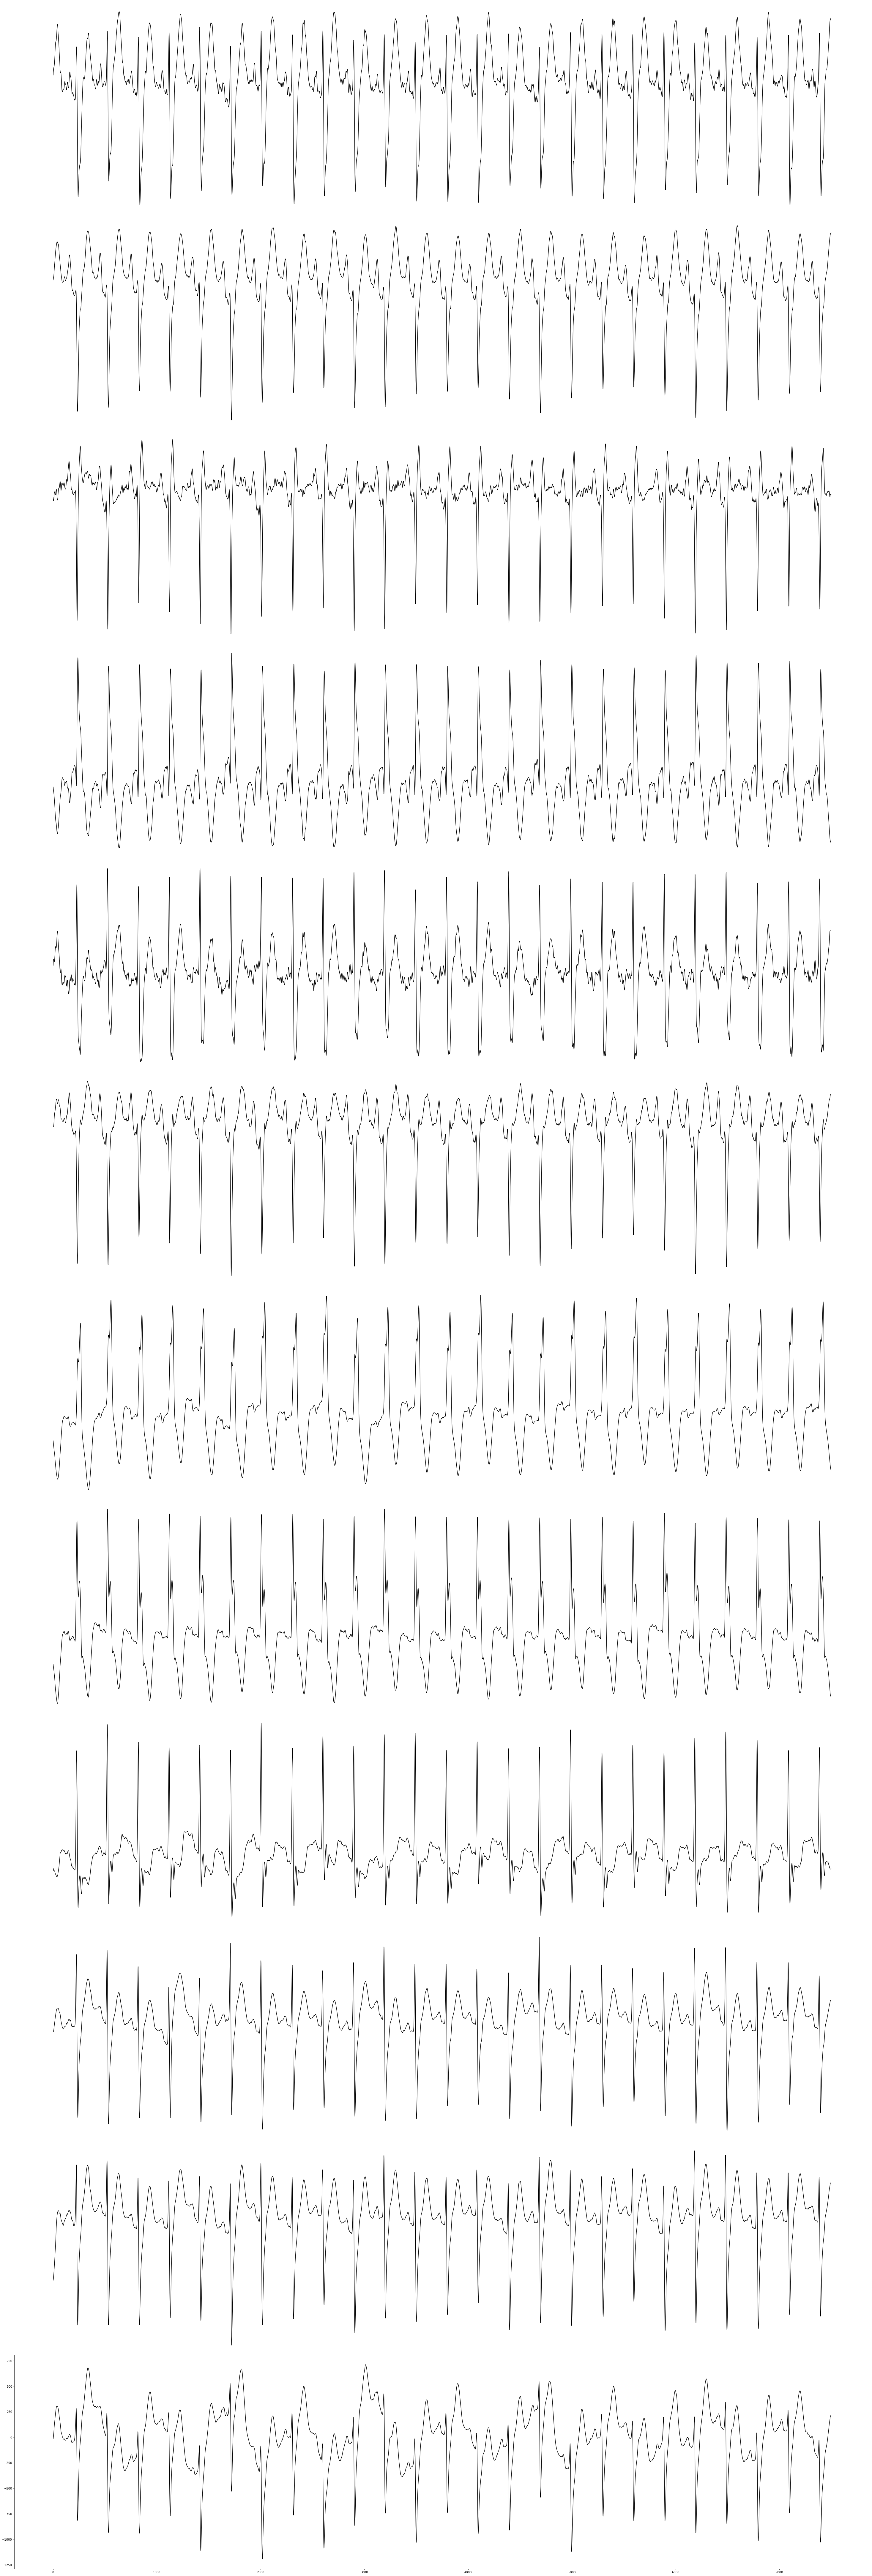

In [180]:
plt.figure()
#figure(num=None, figsize=(100,10), dpi = 100)

fig,lead=plt.subplots(12,1, figsize=(40,120))
#plt.gca().set_axis_off()

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0) #deals with all the whitespace around the plots
#plt.margins(0,0)

lead[0].plot(data[0],'black')
lead[0].set_axis_off()
lead[1].plot(data[1],'black')
lead[1].set_axis_off()
lead[2].plot(data[2],'black')
lead[2].set_axis_off()
lead[3].plot(data[3],'black')
lead[3].set_axis_off()
lead[4].plot(data[4],'black')
lead[4].set_axis_off()
lead[5].plot(data[5],'black')
lead[5].set_axis_off()
lead[6].plot(data[6],'black')
lead[6].set_axis_off()
lead[7].plot(data[7],'black')
lead[7].set_axis_off()
lead[8].plot(data[8],'black')
lead[8].set_axis_off()
lead[9].plot(data[9],'black')
lead[9].set_axis_off()
lead[10].plot(data[10],'black')
lead[10].set_axis_off()
lead[11].plot(data[11],'black')
#lead[11].set_axis_off()

#fig.tight_layout()
plt.show()
fig.savefig('test3.png', transparent = None, bbox_inches = 'tight', pad_inches = 0)

In [53]:
from PIL import Image
img = Image.open('test3.png')
img.size

(2880, 8640)

In [94]:
img= mpimg.imread('test3.png')

In [95]:
img.shape

(6540, 2272, 4)

In [96]:
# Displaying header and data for on file: 'A0001.mat'
tmp_input_file = os.path.join(input_directory,'A5151.mat')
x = loadmat(tmp_input_file)
data = np.asarray(x['val'], dtype=np.float64)

new_file = tmp_input_file.replace('.mat','.hea')
input_header_file = os.path.join(new_file)

with open(input_header_file,'r') as f:
    header_data=f.readlines()

In [97]:
data

array([[-2.000e+00, -3.000e+00, -3.000e+00, ..., -3.000e+00, -3.000e+00,
        -6.000e+00],
       [-2.000e+00, -2.000e+00, -2.000e+00, ..., -3.100e+01, -2.900e+01,
        -3.200e+01],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -2.800e+01, -2.600e+01,
        -2.600e+01],
       ...,
       [-2.000e+01, -3.200e+01, -3.200e+01, ..., -7.000e+01, -6.400e+01,
        -6.700e+01],
       [-8.000e+00, -9.000e+00, -1.100e+01, ..., -2.680e+02, -2.490e+02,
        -2.700e+02],
       [-1.700e+02, -2.410e+02, -2.160e+02, ...,  1.752e+03,  1.667e+03,
         1.855e+03]])

In [98]:
data.shape

(12, 5000)

<Figure size 432x288 with 0 Axes>

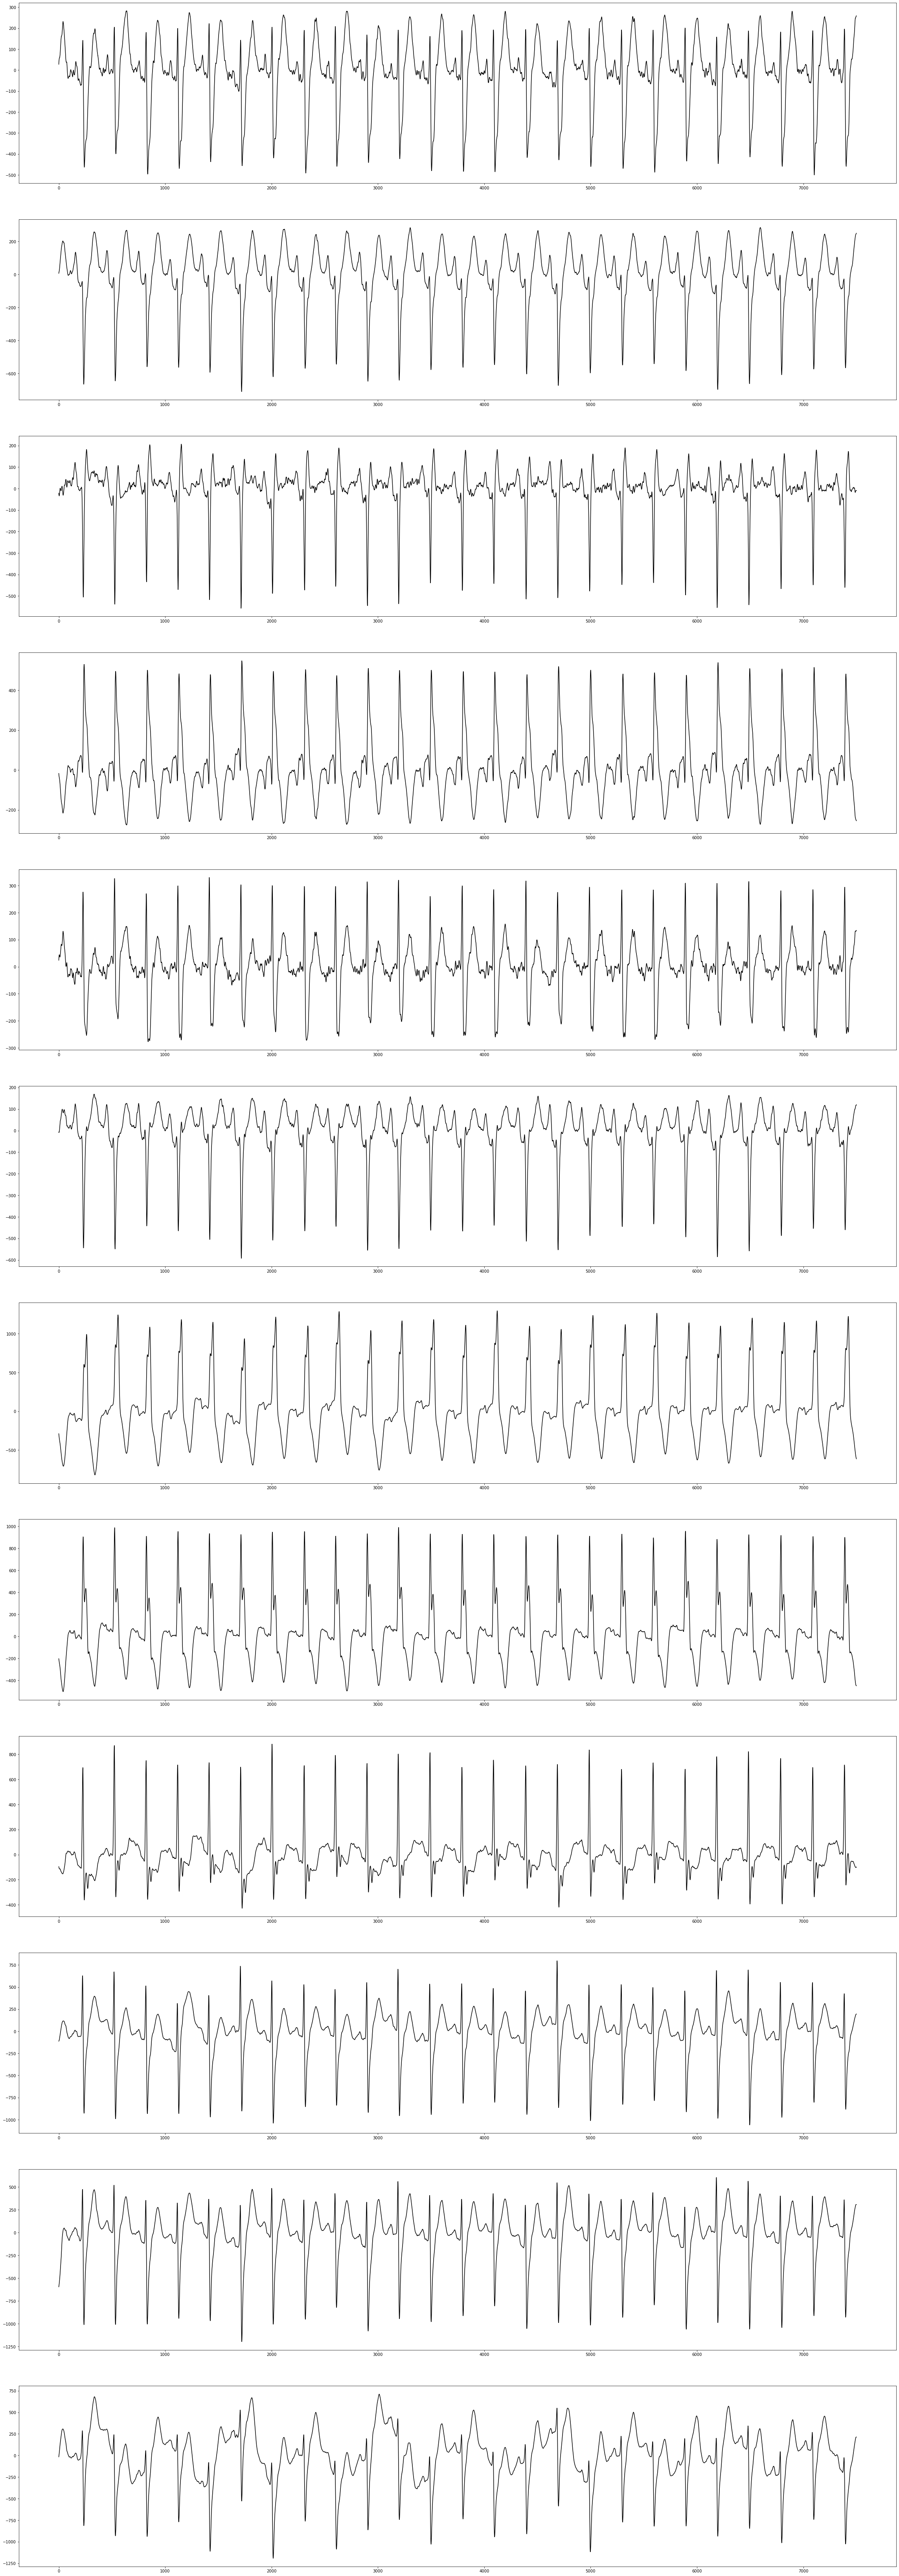

In [44]:
plt.figure()
#figure(num=None, figsize=(100,10), dpi = 100)

fig,(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12)=plt.subplots(12,1, figsize=(40,120))
#plt.gca().set_axis_off()
#plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#            hspace = 0, wspace = 0)
#plt.margins(0,0)

a1.plot(data[0],'black')
a2.plot(data[1],'black')
a3.plot(data[2],'black')
a4.plot(data[3],'black')
a5.plot(data[4],'black')
a6.plot(data[5],'black')
a7.plot(data[6],'black')
a8.plot(data[7],'black')
a9.plot(data[8],'black')
a10.plot(data[9],'black')
a11.plot(data[10],'black')
a12.plot(data[11],'black')

#plt.axis("off")
plt.show()
fig.savefig('test2.png', transparent = None, bbox_inches = 'tight', pad_inches = 0)

In [100]:
header_data

['A5151 12 500 5000 12-May-2020 12:33:59\n',
 'A5151.mat 16+24 1000/mV 16 0 -2 -12 0 I\n',
 'A5151.mat 16+24 1000/mV 16 0 -2 18 0 II\n',
 'A5151.mat 16+24 1000/mV 16 0 0 28 0 III\n',
 'A5151.mat 16+24 1000/mV 16 0 2 0 0 aVR\n',
 'A5151.mat 16+24 1000/mV 16 0 -1 -9 0 aVL\n',
 'A5151.mat 16+24 1000/mV 16 0 -1 15 0 aVF\n',
 'A5151.mat 16+24 1000/mV 16 0 -9 -18 0 V1\n',
 'A5151.mat 16+24 1000/mV 16 0 -73 21 0 V2\n',
 'A5151.mat 16+24 1000/mV 16 0 -68 -30 0 V3\n',
 'A5151.mat 16+24 1000/mV 16 0 -20 56 0 V4\n',
 'A5151.mat 16+24 1000/mV 16 0 -8 58 0 V5\n',
 'A5151.mat 16+24 1000/mV 16 0 -170 -356 0 V6\n',
 '#Age: 94\n',
 '#Sex: Female\n',
 '#Dx: 59118001\n',
 '#Rx: Unknown\n',
 '#Hx: Unknown\n',
 '#Sx: Unknown\n']

In [103]:
img= mpimg.imread('test2.png')

In [104]:
img.shape

(6540, 2272, 4)

In [105]:
print(img)

[[[1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  ...
  [0.2 0.2 0.2 1. ]
  [0.2 0.2 0.2 1. ]
  [0.2 0.2 0.2 1. ]]

 [[1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  ...
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]]

 [[1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  ...
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]]

 ...

 [[1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  ...
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]]

 [[1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  ...
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]]

 [[1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  ...
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]
  [1.  1.  1.  1. ]]]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
#from pyts.image import GADF, GASF
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
X = Image.open('test3.png')
#print(img.size)

# Parameters
#n_samples, n_features = 100, 144

# Toy dataset
#rng = np.random.RandomState(41)
#X = rng.randn(n_samples, n_features)

# GAF transformations
#image_size = 24
#gasf = GramianAngularField(img)
#print(gasf)
#X_gasf = gasf.fit_transform(img)
#X_gasf.shape
#gadf = GADF(image_size)
#X_gadf = gadf.fit_transform(X)

# Show the results for the first time series
#plt.figure(figsize=(16, 8))
#plt.subplot(121)
#plt.imshow(gasf)
#plt.title("GASF", fontsize=16)
#plt.subplot(122)
#plt.imshow(X_gadf[0], cmap='rainbow', origin='lower')
#plt.title("GADF", fontsize=16)
#plt.show()

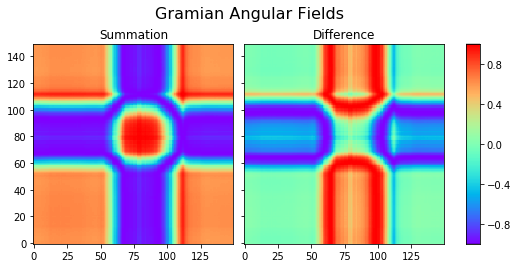

In [21]:
# Parameters
X, _, _, _ = load_gunpoint(return_X_y=True)

# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=150, method='summation')
X_gasf = gasf.fit_transform(X)
gadf = GramianAngularField(image_size=150, method='difference')
X_gadf = gadf.fit_transform(X)

# Show the images for the first time series
fig = plt.figure(figsize=(8, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[0], X_gadf[0]]
titles = ['Summation', 'Difference']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
plt.show()